<a href="https://colab.research.google.com/github/Nithie-code/Naive-Bayes-classification/blob/main/naivesbayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we develop a classification task based Naïve  Bayes to predict whether an individual earns more than $50,000 annually.

**1.Imports**

In [ ]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import os
import io

**2.Uplooad dataset**

In [ ]:
#upload the dataset
from google.colab import files
uploaded=files.upload()


Saving adult.csv to adult.csv


**3.EDA**

In [ ]:
#read the csc file
original_data=pd.read_csv(io.BytesIO(uploaded['adult.csv']))
original_data.head(10)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
original_data.shape


(32560, 15)

In [ ]:
original_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


column names are weird, rename  them with clear, descriptive names for better understanding and interpretation of the data

In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

original_data.columns = col_names

original_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
original_data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
original_data.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Examine missing values in the dataset

In [ ]:
original_data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Explore categorical columns in data

In [ ]:
categorical=[i for i in original_data.columns if original_data[i].dtype=='O']
print('There are {} categorical variables \n' .format(len(categorical)))
print('The categorical variables are : \n', categorical)


There are 9 categorical variables 

The categorical variables are : 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Visualize only categorical data

In [ ]:

original_data[categorical].head(10)


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
5,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
7,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
8,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
9,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K


<Axes: xlabel='education'>

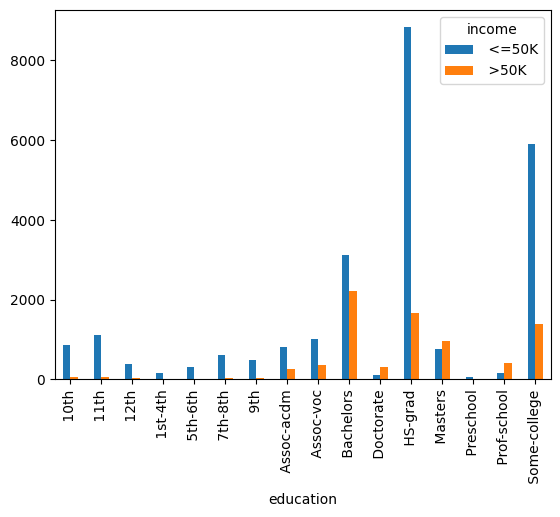

In [ ]:
# @title Income by Education Level

original_data.groupby(['education'])['income'].value_counts().unstack().plot(kind='bar')

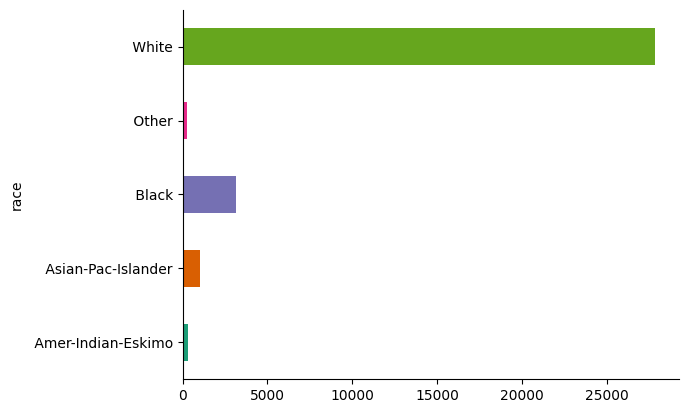

In [ ]:
# @title race

from matplotlib import pyplot as plt
import seaborn as sns
original_data.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

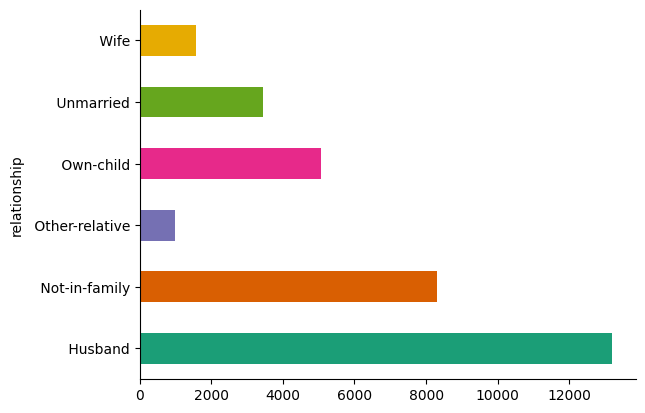

In [ ]:
# @title relationship

from matplotlib import pyplot as plt
import seaborn as sns
original_data.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Finding missing values in categorical columns

In [ ]:
original_data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Frequency counts of Categorical Variables

In [ ]:
for i in categorical:
    print(original_data[i].value_counts())
original_data.head(10)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Explore workclass variable

In [ ]:
original_data.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
#frequency distribution of values in workclass variable
original_data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:


for i in categorical:

    print(i, ' includes ', len(original_data[i].unique()), ' labels')

workclass  includes  9  labels
education  includes  16  labels
marital_status  includes  7  labels
occupation  includes  15  labels
relationship  includes  6  labels
race  includes  5  labels
sex  includes  2  labels
native_country  includes  42  labels
income  includes  2  labels


In [ ]:
# replace the missing values ? by NaN to be detected by python as missing values


original_data['workclass'].replace(' ?', np.NaN, inplace=True)
#original_data.head(10)

In [ ]:
original_data.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
original_data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Explore Occupation Variable

In [ ]:
original_data['occupation'].unique()


array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
original_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
#replace ? by NaN in occupation varibale
original_data['occupation'].replace(' ?', np.NaN, inplace=True)


In [ ]:
original_data['workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Explore native_country variable

In [ ]:
original_data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
original_data['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
# replace the missing values ? by NaN

original_data = original_data.copy()
original_data['native_country'].replace(' ?', np.NaN, inplace=True)
original_data['native_country'].value_counts()


 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
original_data[categorical].isnull().sum()


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Explore numerical variables

In [ ]:
#find numerical variables
numerical=[i for i in original_data.columns if original_data[i].dtype !='O']
print('There are {} numerical varibales \n'.format(len(numerical)))
original_data.head(10)

There are 6 numerical varibales 



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


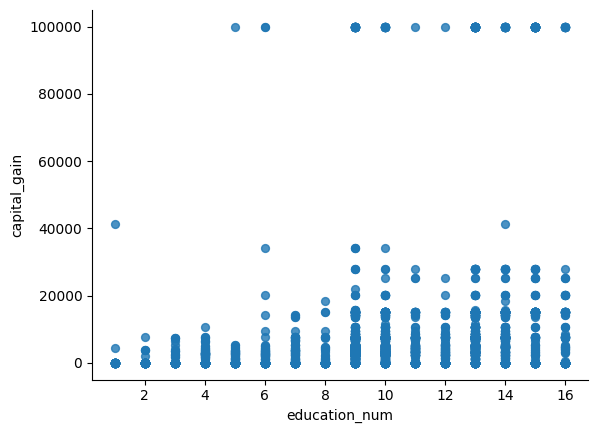

In [ ]:
# @title education_num vs capital_gain

from matplotlib import pyplot as plt
original_data.plot(kind='scatter', x='education_num', y='capital_gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

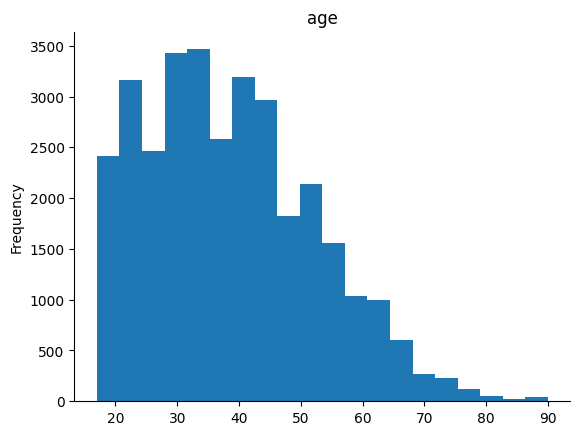

In [ ]:
# @title age

from matplotlib import pyplot as plt
original_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
original_data[numerical].head(10)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
5,49,160187,5,0,0,16
6,52,209642,9,0,0,45
7,31,45781,14,14084,0,50
8,42,159449,13,5178,0,40
9,37,280464,10,0,0,80


In [ ]:
# check missing values in numerical varibales
original_data[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Predictor Variables&Target Variable

In [ ]:
X = original_data.drop(['income'], axis=1)
y=original_data['income']


**4. Split the dataset into training set and testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#check the shape of training and test sets
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(22792, 14) (9768, 14)
(22792,) (9768,)


**5.Feature Engineering**

In [ ]:
#check data  types in traininig set
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [ ]:
#check categorical variables
categorical=[i for i in X_train.columns if X_train[i].dtypes=='O']
print(categorical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [ ]:
#check numerical variables
categorical=[i for i in X_train.columns if X_train[i].dtypes=='O']
numerical=[i for i in X_train.columns if X_train[i].dtypes!='O']
print(numerical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
#check missing values
X_train[categorical].isnull().sum()

workclass         1309
education            0
marital_status       0
occupation        1315
relationship         0
race                 0
sex                  0
native_country     395
dtype: int64

In [ ]:
#check missing values  and print % of missing values in categorical variables of training ste
X_train[categorical].isnull().mean()

workclass         0.057432
education         0.000000
marital_status    0.000000
occupation        0.057696
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017331
dtype: float64

In [ ]:
#print categorical variables with missing values
for i in  categorical:
    if X_train[i].isnull().mean()>0:
        print(i,(X_train[i].isnull().mean()))

workclass 0.057432432432432436
occupation 0.0576956826956827
native_country 0.01733064233064233


In [ ]:
# impute missing categorical variables with most frequent value

for df in [X_train, X_test]:
    df['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [ ]:
#Check missing values in train set
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
#Check missing values in test set
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
X_train[categorical].head(10)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
21385,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,United-States
19749,Private,HS-grad,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,Vietnam
1216,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,China
30048,Federal-gov,Masters,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23077,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
10180,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
12681,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Female,United-States
31751,Private,Some-college,Married-civ-spouse,Sales,Wife,White,Female,United-States
17581,Self-emp-inc,Some-college,Never-married,Craft-repair,Not-in-family,White,Male,United-States
31032,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,Black,Male,Jamaica


In [ ]:
# encode categorical variables

!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
#check the train_set features
X_train.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
21385,32,1,0,0,0,0,0,0,0,732102,...,0,0,0,0,0,0,0,0,0,0
19749,23,1,0,0,0,0,0,0,0,72887,...,0,0,0,0,0,0,0,0,0,0
1216,33,1,0,0,0,0,0,0,0,163003,...,0,0,0,0,0,0,0,0,0,0
30048,56,0,1,0,0,0,0,0,0,187873,...,0,0,0,0,0,0,0,0,0,0
23077,50,1,0,0,0,0,0,0,0,43764,...,0,0,0,0,0,0,0,0,0,0
10180,43,1,0,0,0,0,0,0,0,108945,...,0,0,0,0,0,0,0,0,0,0
12681,19,1,0,0,0,0,0,0,0,357059,...,0,0,0,0,0,0,0,0,0,0
31751,37,1,0,0,0,0,0,0,0,140673,...,0,0,0,0,0,0,0,0,0,0
17581,48,0,0,1,0,0,0,0,0,85109,...,0,0,0,0,0,0,0,0,0,0
31032,55,1,0,0,0,0,0,0,0,132887,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the test_set features
X_test.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
14160,38,1,0,0,0,0,0,0,0,680390,...,0,0,0,0,0,0,0,0,0,0
27047,45,0,0,0,0,0,1,0,0,50567,...,0,0,0,0,0,0,0,0,0,0
28867,29,1,0,0,0,0,0,0,0,185908,...,0,0,0,0,0,0,0,0,0,0
5667,51,1,0,0,0,0,0,0,0,306108,...,0,0,0,0,0,0,0,0,0,0
7827,46,1,0,0,0,0,0,0,0,124071,...,0,0,0,0,0,0,0,0,0,0
15382,55,1,0,0,0,0,0,0,0,56645,...,0,0,0,0,0,0,0,0,0,0
4641,21,1,0,0,0,0,0,0,0,315065,...,0,0,0,0,0,0,0,0,0,0
8943,19,1,0,0,0,0,0,0,0,112432,...,0,0,0,0,0,0,0,0,0,0
216,38,1,0,0,0,0,0,0,0,182609,...,0,0,0,0,0,0,0,0,0,0
5121,34,1,0,0,0,0,0,0,0,45522,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check gain the train and test size
print(X_train.shape, X_test.shape)

(22792, 105) (9768, 105)


In [ ]:
#Check the test set features
X_test.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
14160,38,1,0,0,0,0,0,0,0,680390,...,0,0,0,0,0,0,0,0,0,0
27047,45,0,0,0,0,0,1,0,0,50567,...,0,0,0,0,0,0,0,0,0,0
28867,29,1,0,0,0,0,0,0,0,185908,...,0,0,0,0,0,0,0,0,0,0
5667,51,1,0,0,0,0,0,0,0,306108,...,0,0,0,0,0,0,0,0,0,0
7827,46,1,0,0,0,0,0,0,0,124071,...,0,0,0,0,0,0,0,0,0,0
15382,55,1,0,0,0,0,0,0,0,56645,...,0,0,0,0,0,0,0,0,0,0
4641,21,1,0,0,0,0,0,0,0,315065,...,0,0,0,0,0,0,0,0,0,0
8943,19,1,0,0,0,0,0,0,0,112432,...,0,0,0,0,0,0,0,0,0,0
216,38,1,0,0,0,0,0,0,0,182609,...,0,0,0,0,0,0,0,0,0,0
5121,34,1,0,0,0,0,0,0,0,45522,...,0,0,0,0,0,0,0,0,0,0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [ ]:
#show the train_set features after scaling
X_train.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.649359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.886948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.130124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.131533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.584121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.499623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.55,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.784304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.383048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#show the test_set features after scaling
X_test.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.215065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.074399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.071720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.457088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.023354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.146944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.554836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.116768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**6.Model training**

In [ ]:
# In our model we use a Gaussian Bayes classifier
from sklearn.naive_bayes import GaussianNB
#instanciate the model
gnb = GaussianNB()
#fit the model
gnb.fit(X_train,y_train)


GaussianNB()

**7.Predict the outcomes**

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Model Accuracy Score :{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model Accuracy Score :0.7968


In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7955


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print('Classification Report :\n')
print(format(classification_report(y_test, y_pred)))

Classification Report :

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.85      7395
        >50K       0.56      0.82      0.66      2373

    accuracy                           0.80      9768
   macro avg       0.74      0.80      0.76      9768
weighted avg       0.84      0.80      0.81      9768



Check Overfitting

In [ ]:
print('Training set outcome: {:.3f}'.format(gnb.score(X_train, y_train)))

print('Test set outcome: {:.3f}'.format(gnb.score(X_test, y_test)))

Training set outcome: 0.795
Test set outcome: 0.797


Check  the Null Accuracy

In [ ]:
#Check calss distribution in the test s
print(y_test.value_counts())
null_accuracy=(7395/(7395+2373))
print('The Null Accury Score:{0:0.3f}'.format(null_accuracy))


 <=50K    7395
 >50K     2373
Name: income, dtype: int64
The Null Accury Score:0.757


In [ ]:
# Print Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
#Slicing the confusion matrix
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[5839 1556]
 [ 429 1944]]


<Axes: >

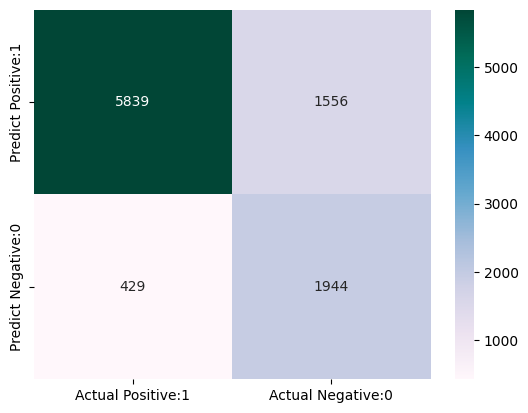

In [ ]:
# Dsiplay confusion matrix
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn')